<span style="font-size: 24px; font-weight: bold;">"Project: Analyzing Real Estate Trends on otodom.pl" </span>

<span style="font-size: 18px;">      The dataset for this project was obtained from otodom.pl, a prominent real estate website in Poland. The dataset includes information related to real estate listings, including property details, prices, locations, and more. It represents a valuable resource for real estate market analysis in Poland. </span>

<span style="font-size: 20px;">Importing Libraries:</span>

In [35]:
#import python libraries

import pandas as pd
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine
from snowflake.connector.pandas_tools import pd_writer
import matplotlib.pyplot as plt   #visualizing data
import time 

<span style="font-size: 20px;">Load Dataset from Snowflake:</span>

In [36]:
# Establish a connection to a Snowflake data warehouse using the credentials

start_time = time.time()
 
engine = create_engine(URL(
                    account = 'iadcwcn-vb02070',
                    user = 'username_123',
                    password = 'password@123',
                    database = 'project',
                    schema = 'public',
                    warehouse = 'project_wh'))

with engine.connect() as conn:
    try:
        query = """ select * from OTODOM_DATA_TRANSFORMED """
        print("--- %s seconds ---" % (time.time() - start_time))
        
        df = pd.read_sql(query,conn)

        print(df.info())

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

print("--- FINAL --- %s seconds ---" % (time.time() - start_time))

--- 1.5565452575683594 seconds ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rn                      62802 non-null  int64  
 1   advertiser_type         62802 non-null  object 
 2   balcony_garden_terrace  62802 non-null  object 
 3   description             62802 non-null  object 
 4   heating                 62802 non-null  object 
 5   is_for_sale             62802 non-null  object 
 6   lighting                62802 non-null  object 
 7   location                62802 non-null  object 
 8   price                   62802 non-null  object 
 9   remote_support          62802 non-null  object 
 10  rent_sale               62802 non-null  object 
 11  surface                 62802 non-null  object 
 12  timestamp               62802 non-null  object 
 13  title                   62802 non-null  object 
 14  url

In [37]:
print(df.head()) 
print(df.shape) 

   rn advertiser_type balcony_garden_terrace  \
0  11         private                    Ask   
1  30        business                Balcony   
2  57        business                Balcony   
3  59         private                Balcony   
4  63        business                Balcony   

                                         description      heating is_for_sale  \
0  Przedstawiamy Państwu ofertę sprzedaży obiektu...          Ask        TRUE   
1  ZAKĄTEK HARMONIA ul. Płochocińska 101\r\n\r\n!...        urban        TRUE   
2  Przedstawiam Państwu na wynajem atrakcyjne mie...  boiler_room       FALSE   
3  Kraków – os. Mistrzejowice – 63 m²\r\n3-POKOJO...        urban        TRUE   
4  ZAKĄTEK HARMONIA ul. Płochocińska 101\r\n\r\n!...        urban        TRUE   

  lighting                                           location  \
0      Ask           Longitude: 21.00817 | Latitude: 52.23614   
1      Ask         Longitude: 21.029306 | Latitude: 52.336575   
2      Ask  Longitude: 16.943

<span style="font-size: 20px;">Data Cleaning Process:</span>

In [38]:
df.isnull().sum()

rn                            0
advertiser_type               0
balcony_garden_terrace        0
description                   0
heating                       0
is_for_sale                   0
lighting                      0
location                      0
price                         0
remote_support                0
rent_sale                     0
surface                       0
timestamp                     0
title                         0
url                           0
form_of_property          28448
no_of_rooms                5509
parking_space                 0
price_new                     0
surface_new                   0
suburb                     6281
city                          0
country                    3904
title_eng                     0
apartment_flag                0
dtype: int64

In [39]:
df.describe(include = 'object')

,advertiser_type,balcony_garden_terrace,description,heating,is_for_sale,lighting,location,price,remote_support,rent_sale,...,title,url,form_of_property,no_of_rooms,parking_space,suburb,city,country,title_eng,apartment_flag
count,62802,62802,62802,62802,62802,62802,62802,62802,62802,62802,...,62802,62802,34354,57293,62802,56521,62802,58898,62802,62802
unique,2,2,59335,9,2,3,30565,16696,2,1641,...,52789,62802,4,10,4,171,6,1,52328,1
top,business,Balcony,Inwestycja Apartamenty Czeremchowa to nowoczes...,urban,TRUE,Ask,Longitude: 17.044666049486 | Latitude: 51.0983...,"PLN 3,000.00",No,No,...,"Apartamenty Czeremchowa, 4 pokoje, taras+ogród!",https://www.otodom.pl/pl/oferta/gosciniec-wier...,full ownership,2,Ask,Śródmieście,Warszawa,Polska,Czeremchów apartments! A studio apartment with...,apartment
freq,56526,31596,126,28542,49773,62641,381,639,55964,38392,...,120,1,31034,20739,32807,3153,21198,58898,120,62802


In [40]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*70)

advertiser_type
['private' 'business']
----------------------------------------------------------------------
balcony_garden_terrace
['Ask' 'Balcony']
----------------------------------------------------------------------
description
['Przedstawiamy Państwu ofertę sprzedaży obiektu inwestycyjnego, w okazyjnej cenie.\r\nZalety:\r\n-obiekt położony w przepięknej części mazur w miejscowości Orzysz, Wojskowej Stoicy Polski, Wędkarskim sercu Mazur\r\n-zlokalizowany jest w strefie usług, gdzie imprezy można prowadzić 24/7.\r\n-posiada dużą salę na parterze, w pełni wyposażoną kuchnię, salę mniejszą na piętrze, 12 pokoi gościnnych, mieszkanie z tarasem,salonem, aneksem kuchennym, sypialnią,garderobą, łazienką, holem i pokojem.\r\n-teren zagospodarowany, ze stawem, drzewami, altaną grilową, częściowo utwardzony\r\n- możliwość organizacji imprez, wynajęcia pokoi, otwarcia kręgielnii, baru, ogródka wakacyjnego, dyskoteki, bilarda etc\r\n-zapas terenu zielonego na budowę domków, basenu, powiększe

In [41]:
df['country'].fillna('Polska',inplace = True)

In [42]:
unique_values = df['country'].unique()
unique_values

array(['Polska'], dtype=object)

In [43]:
#drop columns of no longer informative.
df.drop(['form_of_property'],axis =1,inplace = True)
df.isnull().sum()
#removing rows with null values(significantly small)
df.dropna(inplace = True)

In [44]:
df.shape

(51519, 24)

 <span style="font-size: 24px; font-weight: bold;">Exploratory Data Analysis</span>

<span style="font-size: 20px;">Average rent of 1 Room,2 room,3 room & 4 Room Apartments in Various cities</span>


       city  avg_rent_1r  avg_rent_2r  avg_rent_3r  avg_rent_4r
0  Warszawa      2763.49      4219.87      6924.58     12533.66
1   Wrocław      2428.07      3108.77      4491.62      7160.99
2    Kraków      2394.79      3024.76      4234.96      6514.03
3    Gdańsk      2374.17      2930.99      4452.33      6170.89
4  Katowice      1716.44      2335.50      3156.23      5494.10


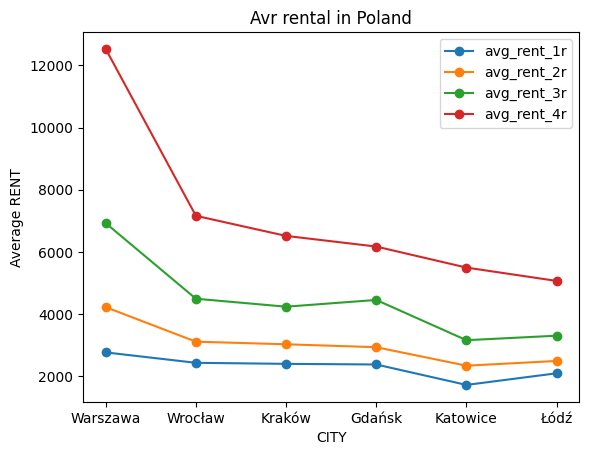

In [45]:
with engine.connect() as conn:
    try:
        query =  """ SELECT city,
                            ROUND(AVG(CASE WHEN no_of_rooms = 1 THEN price_new END), 2) as avg_rent_1R,
                            ROUND(AVG(CASE WHEN no_of_rooms = 2 THEN price_new END), 2) as avg_rent_2R,
                            ROUND(AVG(CASE WHEN no_of_rooms = 3 THEN price_new END), 2) as avg_rent_3R,
                            ROUND(AVG(CASE WHEN no_of_rooms = 4 THEN price_new END), 2) as avg_rent_4R
                     FROM otodom_data_transformed
                     WHERE city IN ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                     AND apartment_flag = 'apartment'
                     AND lower(is_for_sale) = 'false'
                     AND no_of_rooms IN (1, 2, 3, 4)
                     GROUP BY city
                     ORDER BY avg_rent_4R DESC;  """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        df.plot(x="city", y=["avg_rent_1r","avg_rent_2r","avg_rent_3r","avg_rent_4r"]
                      ,  title="Avr rental in Poland", xlabel='CITY', ylabel='Average RENT',marker = 'o');

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

<span style="font-size: 18px;">Average Sale Price of Apartments in Various cities:</span>

In [46]:
with engine.connect() as conn:
    try:
        query = """ WITH cte AS (
                                SELECT city, is_for_sale, AVG(price_new) as avg_sale
                                FROM otodom_data_transformed
                                WHERE city IN ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                                AND apartment_flag = 'apartment'
                                GROUP BY city, is_for_sale
                                )
                                SELECT city, MAX(avg_sale) as avg_sale
                                FROM cte
                                WHERE is_for_sale = 'true'
                                GROUP BY city
                                ORDER BY avg_sale DESC;  """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        df.plot.bar(x="city", y="avg_sale"
                      ,  title="Avr Sale_price of Apartments", xlabel='CITY', ylabel='Average Sale_Price');
        
    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

Empty DataFrame
Columns: [city, avg_sale]
Index: []
--- Error ---  no numeric data to plot


<span style="font-size: 20px;">Average Rent of Apartment in Warszawa based on surface Area:</span>

           suburb  avg_price_upto_50  avg_price_upto_100  avg_price_over_100
0          Bemowo            2676.33             4453.14            10303.38
1       Białołęka            2534.96             4139.81             9363.91
2         Bielany            2899.43             4084.81            10295.00
3         Mokotów            3274.93             5762.19            12945.99
4  Praga-Południe            3006.13             4765.08            12511.17


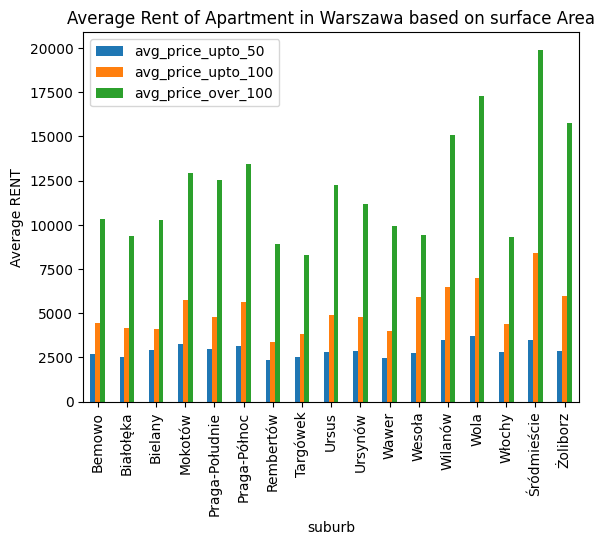

In [47]:
with engine.connect() as conn:
    try:
        query = """ WITH cte AS (
                                SELECT suburb,
                                       CASE
                                           WHEN surface_new BETWEEN 0 AND 50 THEN '0-50'
                                           WHEN surface_new BETWEEN 50 AND 100 THEN '50-100'
                                           ELSE '>100'
                                       END AS area_category,
                                       AVG(CASE WHEN lower(is_for_sale) = 'false' THEN price_new ELSE NULL END) AS avg_price
                                FROM otodom_data_transformed
                                WHERE city = 'Warszawa'
                                      AND apartment_flag = 'apartment'
                                      AND suburb IS NOT NULL
                                GROUP BY suburb, area_category
                                )
                                SELECT suburb,
                                       ROUND(MAX(CASE WHEN area_category = '0-50' THEN avg_price END), 2) AS avg_price_upto_50,
                                       ROUND(MAX(CASE WHEN area_category = '50-100' THEN avg_price END), 2) AS avg_price_upto_100,
                                       ROUND(MAX(CASE WHEN area_category = '>100' THEN avg_price END), 2) AS avg_price_over_100
                                FROM cte
                                GROUP BY suburb
                                ORDER BY suburb;  """


        df = pd.read_sql(query,conn)
        print(df.head())
        
        df.plot.bar(x="suburb", y=["avg_price_upto_50","avg_price_upto_100","avg_price_over_100"]
                      ,title="Average Rent of Apartment in Warszawa based on surface Area", xlabel='suburb', ylabel='Average RENT');

        #plt.show();

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

<span style="font-size: 18px;">Average Area by City in Price range between 3000 and 4000:</span>

       city  avg_area
0  Warszawa     49.28
1   Wrocław     53.72
2    Kraków     54.09
3    Gdańsk     54.98
4  Katowice     71.37


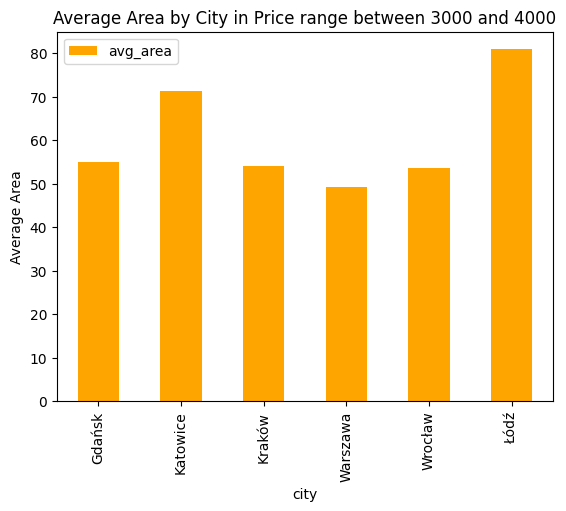

In [48]:
with engine.connect() as conn:
    try:
        query = """ SELECT city, 
                           ROUND(AVG(surface_new), 2) AS avg_area
                    FROM otodom_data_transformed
                    WHERE city IN ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                    AND apartment_flag = 'apartment'
                    AND lower(is_for_sale) = 'false'
                    AND price_new BETWEEN 3000 AND 4000
                    GROUP BY city
                    ORDER BY avg_area;
 """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        # Create a DataFrame pivot table with "city" as the index and "avg_area" as values
        pivot_table = df.pivot_table(index="city", values="avg_area")
        
        # Create a stacked bar chart
        pivot_table.plot(kind="bar", stacked=True, color='orange')
        
        # Set the title
        plt.title("Average Area by City in Price range between 3000 and 4000")
        
        # Set the y-axis label
        plt.ylabel("Average Area")
        
        # Display the stacked bar chart
        plt.show()

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

 <span style="font-size: 20px;">Percentage of Private & Business Ads on Otodom</span>

  business_ads_perc private_ads_perc
0            90.01%            9.99%


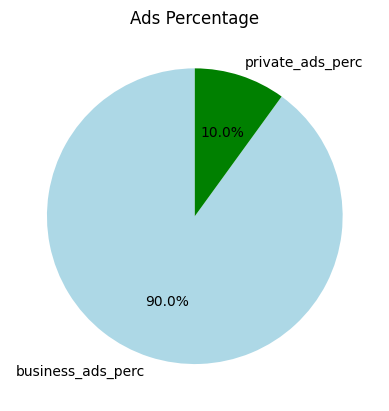

In [49]:
with engine.connect() as conn:
    try:
        query = """ WITH ads_data AS (
                        SELECT
                        advertiser_type,
                        COUNT(1) AS ads_count
                        FROM otodom_data_transformed
                        GROUP BY advertiser_type)
                        SELECT
                        CONCAT(ROUND(100 * SUM(CASE WHEN advertiser_type = 'business' THEN ads_count ELSE 0 END) / SUM(ads_count), 2), '%') AS business_ads_perc,
                        CONCAT(ROUND(100 * SUM(CASE WHEN advertiser_type = 'private' THEN ads_count ELSE 0 END) / SUM(ads_count), 2), '%') AS private_ads_perc
                        FROM ads_data;  """
                                
        df = pd.read_sql(query,conn)
        print(df.head())

        pie_data = df[["business_ads_perc", "private_ads_perc"]].replace('%', '', regex=True).astype(float)
        
        pie_data.sum().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'green'])
        plt.title("Ads Percentage")
        
        plt.show();

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

<span style="font-size: 20px;">Top 3 most Luxurious Neighborhoods in Warsaw</span>

        suburb  luxurious_apartments
0      Mokotów                   367
1  Śródmieście                   308
2      Wilanów                   276


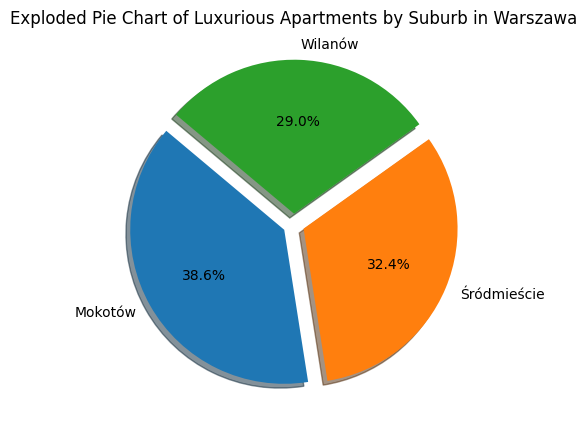

In [50]:
with engine.connect() as conn:
    try:
        query = """WITH suburb_counts AS (
                            SELECT suburb, COUNT(1) AS luxurious_apartments
                            FROM otodom_data_transformed
                            WHERE city = 'Warszawa'
                            AND apartment_flag = 'apartment'
                            AND lower(is_for_sale) = 'true'
                            AND price_new > 2000000
                            AND suburb IS NOT NULL
                            GROUP BY suburb
                            )  
                            SELECT suburb, luxurious_apartments
                            FROM (
                                SELECT *,
                                RANK() OVER (ORDER BY luxurious_apartments DESC) AS rn
                                FROM suburb_counts) x
                            WHERE rn <= 3; """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        
        # Create data for the pie chart
        labels = df["suburb"]
        sizes = df["luxurious_apartments"]
        explode = (0.07, 0.07, 0.07)  # Adjust the values to control the explosion effect
        
        # Create a pie chart with the "explode" effect
        plt.figure(figsize=(5,5))  # Adjust the figure size as needed
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
        
        # Set the title
        plt.title("Exploded Pie Chart of Luxurious Apartments by Suburb in Warszawa")
       
        plt.show();

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

<span style="font-size: 20px;">Most Expensive Apartments and its Details:</span>

In [51]:
with engine.connect() as conn:
    try:
        query = """WITH max_price_cte AS (
                            SELECT city, max(price_new) AS max_price
                            FROM otodom_data_transformed
                            WHERE city IN ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                            AND apartment_flag = 'apartment'
                            AND lower(is_for_sale) = 'true'
                            GROUP BY city
                            )
                            SELECT ot.rn, ot.title_eng, ot.city, ot.suburb, ot.price_new, ot.surface_new, ot.url
                            FROM otodom_data_transformed ot
                            JOIN max_price_cte mpc ON ot.city = mpc.city
                            AND ot.price_new = mpc.max_price
                            WHERE ot.apartment_flag = 'apartment'
                            AND lower(ot.is_for_sale) = 'true'
                            ORDER BY ot.city, ot.price_new; """
        
        df = pd.read_sql(query,conn)
        print(df.head())

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

       rn                                          title_eng      city  \
0   80547                 House (detached) - Gdańsk Wrzeszcz    Gdańsk   
1  293266                      A unique place in Śródmieście  Katowice   
2  248766       Penthouse High standard - Zabłocie -Sarmacka    Kraków   
3  189495                     Apartment - Warsaw Śródmieście  Warszawa   
4  281249  Top location, house with a swimming pool in Mo...  Warszawa   

           suburb   price_new  surface_new  \
0  Wrzeszcz Górny  10900000.0       457.49   
1            None   6333210.0       179.54   
2        Podgórze  11400000.0        61.00   
3     Śródmieście  20000000.0       195.70   
4         Mokotów  20000000.0       577.00   

                                                 url  
0  https://www.otodom.pl/pl/oferta/dom-wolnostoja...  
1  https://www.otodom.pl/pl/oferta/wyjatkowy-loka...  
2  https://www.otodom.pl/pl/oferta/penthouse-wyso...  
3  https://www.otodom.pl/pl/oferta/mieszkanie-war...  
4  

<span style="font-size: 18px;">Conclusion:

The data suggests that in Polish cities, apartment prices tend to increase with larger surface areas, with Warszawa having the highest average prices for both rent and sale. Additionally, a significant proportion of ads are posted by businesses rather than private individuals, and Mokotów, Śródmieście, and Wilanów are the top suburbs for luxurious apartments with prices exceeding 2 million PLN in Warszawa.</span>